# FP Data Mining Kelompok 31

## Import Library

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import classification_report, confusion_matrix
import shap

## Load Dataset

In [ ]:
df_white = pd.read_csv('winequality-white.csv', sep=';')
df_red = pd.read_csv('winequality-red.csv',sep=';')

In [43]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [44]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Distribusi Target (White dan Red)

In [45]:
df_white['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [46]:
df_red['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

## Melihat Null Value

In [47]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [48]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Menambah Fitur "type"

In [49]:
df_red['type'] = 'red'

In [50]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [51]:
df_white['type'] = 'white'

In [52]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## Menggabungkan Dataset White dan Red Wine

In [53]:
df = pd.concat([df_red, df_white], ignore_index=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## EDA

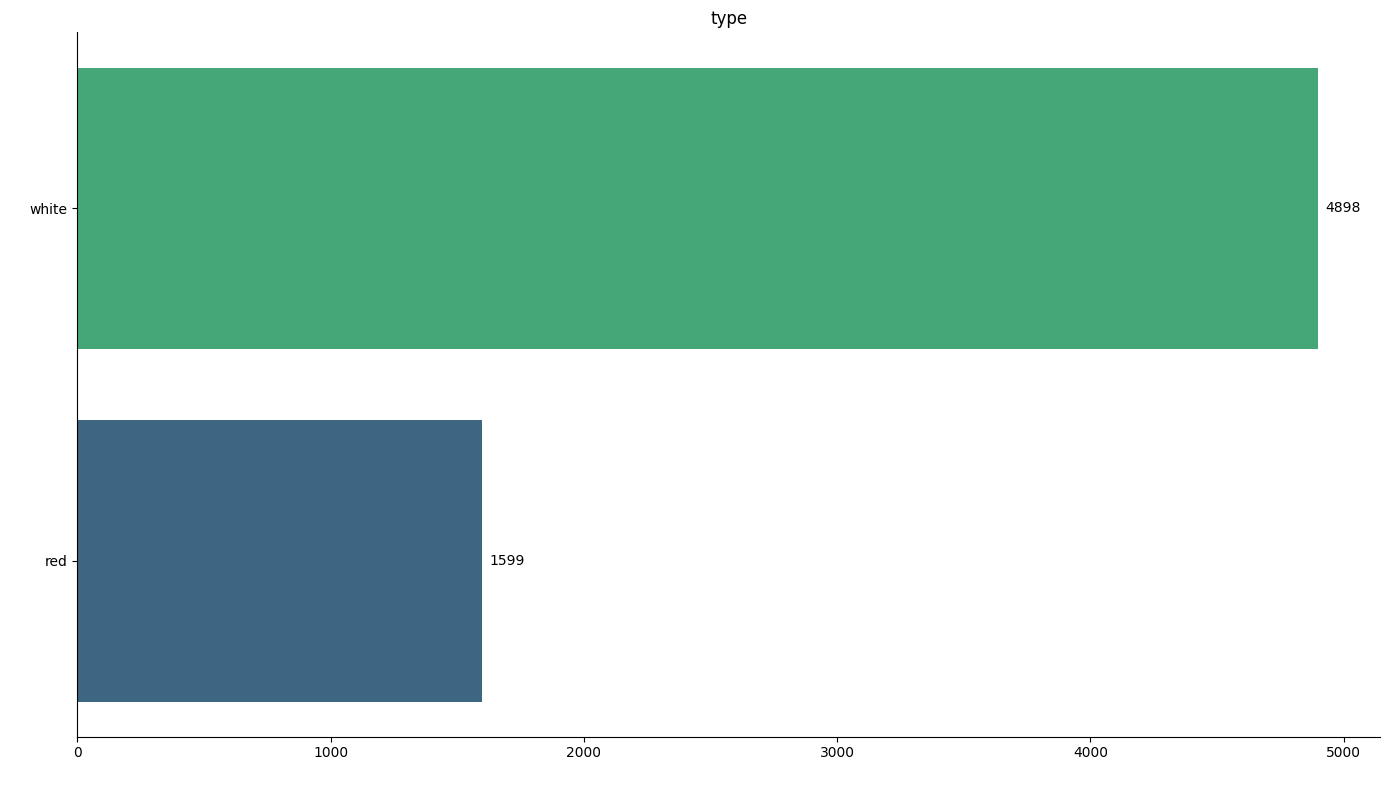

In [55]:
cat_col = df.select_dtypes('object').columns

for col in cat_col:
    plt.figure(figsize=(14, 8))
    ax = sns.countplot(
        data=df,
        y=col,
        hue=col,
        order=df[col].value_counts().index,
        palette='viridis',
        legend=False
    )
    plt.title(f"{col}")
    plt.xlabel(" ")
    plt.ylabel(" ")

    for p in ax.patches:
        count = int(p.get_width())
        ax.annotate(
            count,
            (p.get_width(), p.get_y() + p.get_height() / 2),
            ha='left', va='center',
            fontsize=10, color='black',
            xytext=(5, 0), textcoords='offset points'
        )

    sns.despine()
    plt.tight_layout()
    plt.show()


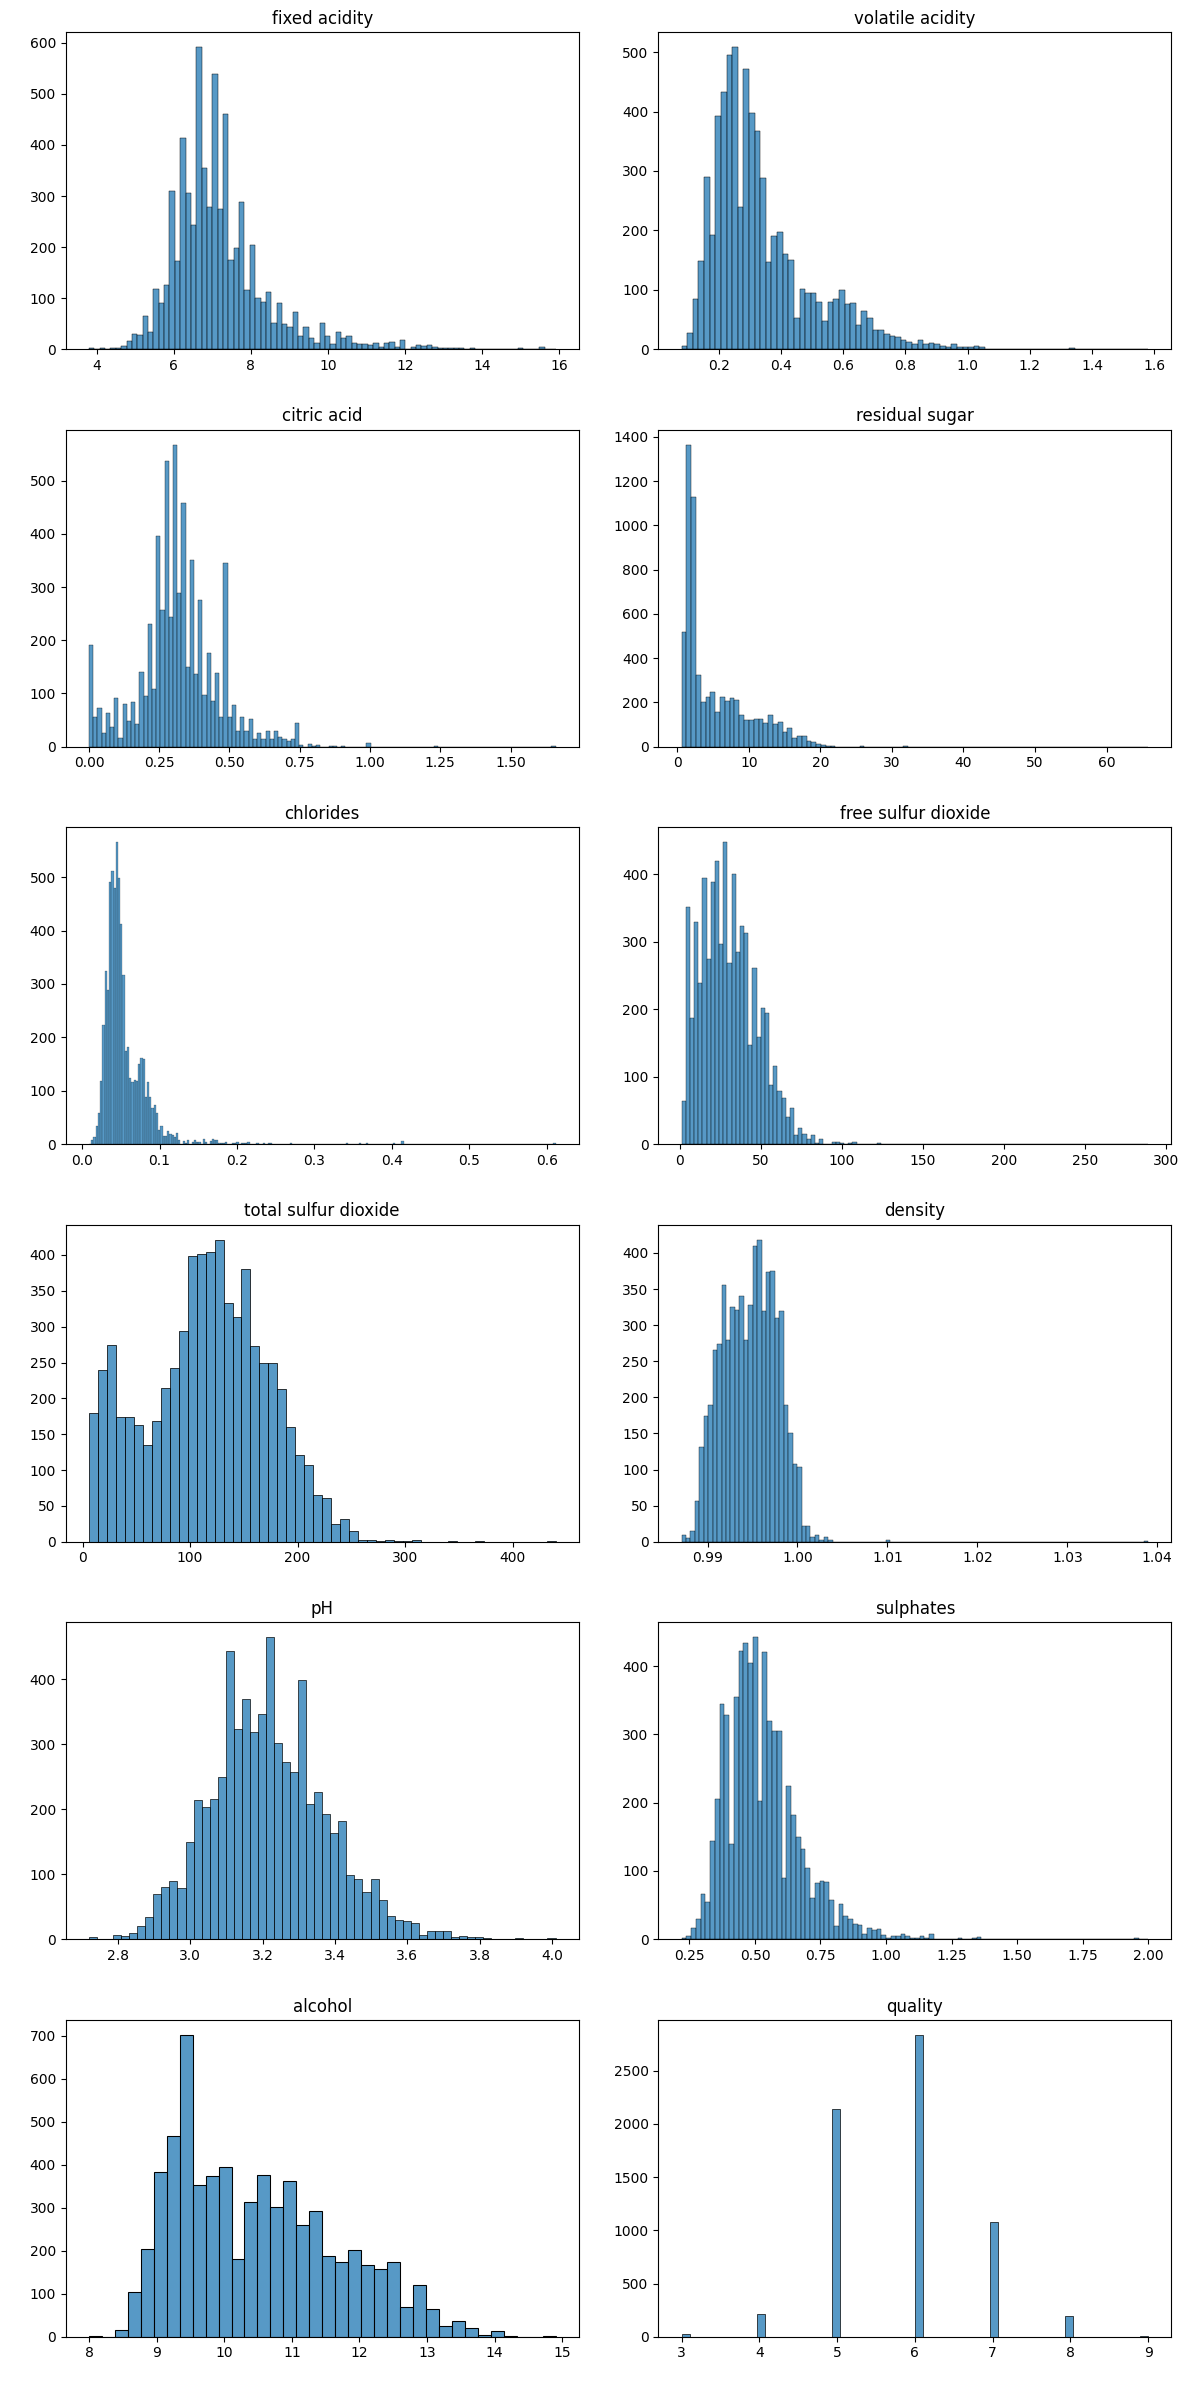

In [56]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 2
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))

axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(" ")
    axes[i].set_ylabel(" ")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Target Categorization

In [57]:
quality_map = {
    9: 'Good',
    8: 'Good',
    7: 'Middle',
    6: 'Middle',
    5: 'Bad',
    4: 'Bad',
    3: 'Bad'
}

df = df.replace({'quality': quality_map})
df_copy = df
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bad,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Bad,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Bad,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Middle,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bad,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Middle,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Bad,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Middle,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Middle,white


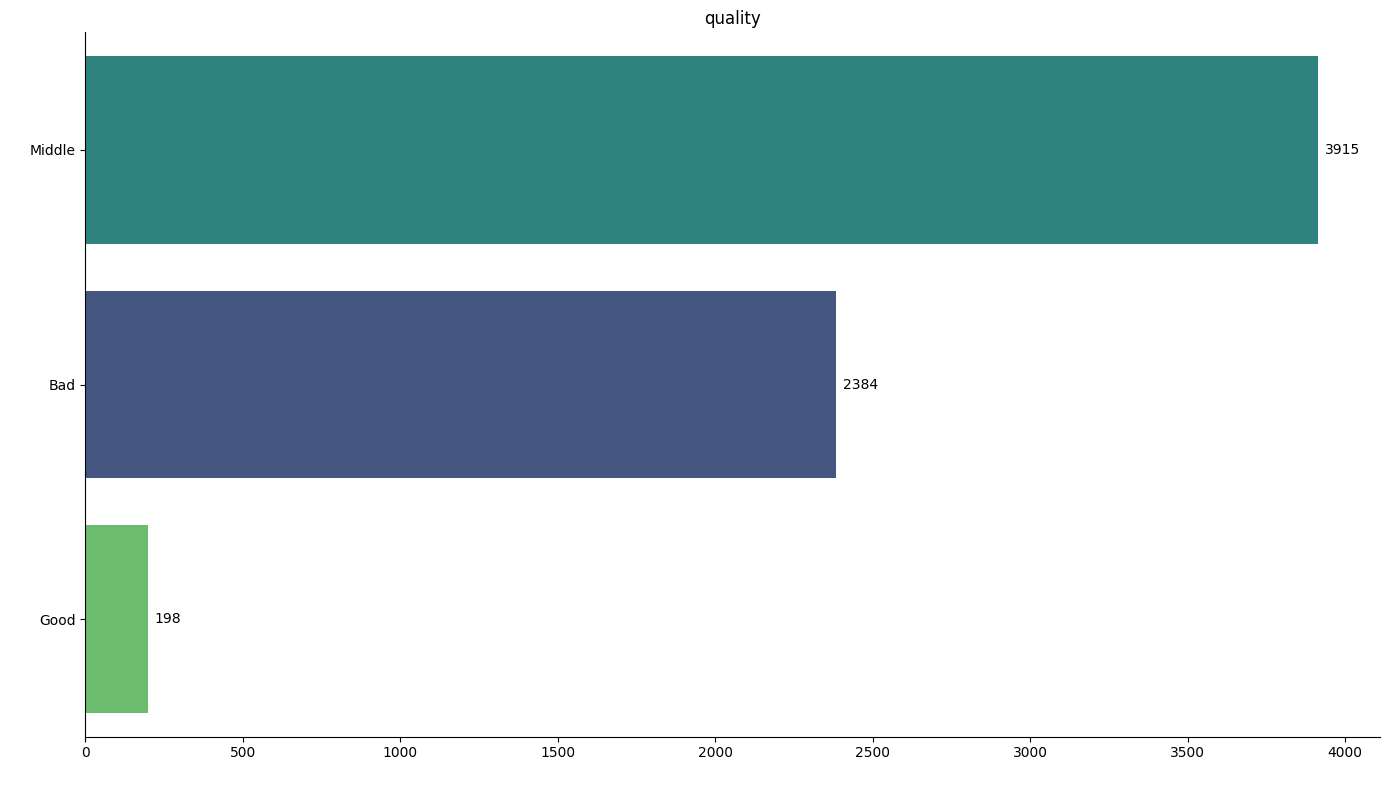

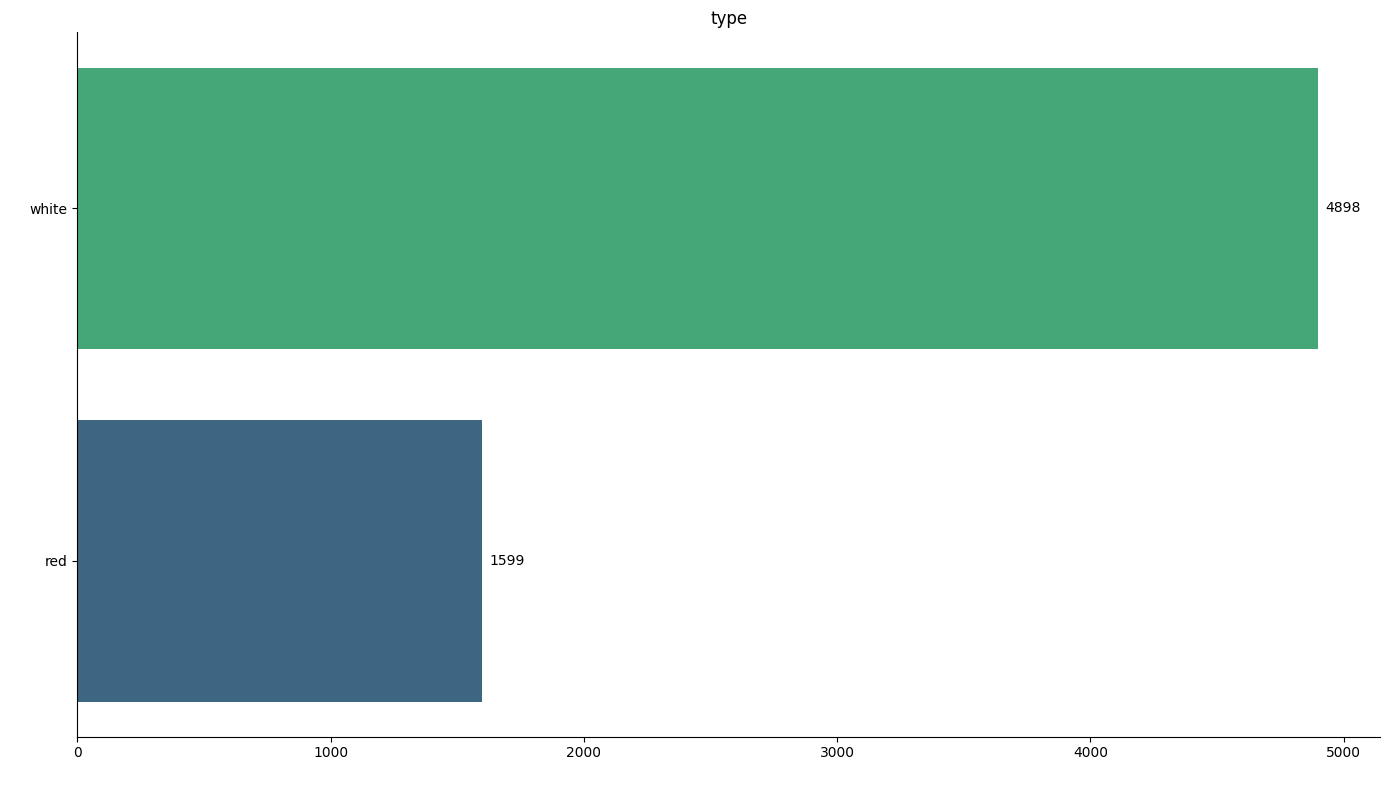

In [58]:
cat_col = df.select_dtypes('object').columns

for col in cat_col:
    plt.figure(figsize=(14, 8))
    ax = sns.countplot(
        data=df,
        y=col,
        hue=col,
        order=df[col].value_counts().index,
        palette='viridis',
        legend=False
    )
    plt.title(f"{col}")
    plt.xlabel(" ")
    plt.ylabel(" ")

    for p in ax.patches:
        count = int(p.get_width())
        ax.annotate(
            count,
            (p.get_width(), p.get_y() + p.get_height() / 2),
            ha='left', va='center',
            fontsize=10, color='black',
            xytext=(5, 0), textcoords='offset points'
        )

    sns.despine()
    plt.tight_layout()
    plt.show()

## Data Preprocessing

In [59]:
# ==========================================================
# 1. ORDINAL ENCODE TARGET (Bad < Middle < Good)
# ==========================================================

quality_order = ["Bad", "Middle", "Good"]
ord_encoder = OrdinalEncoder(categories=[quality_order])
df["quality_encoded"] = ord_encoder.fit_transform(df[["quality"]]).astype(int)

# ==========================================================
# 2. IDENTIFY NUMERIC & CATEGORICAL COLUMNS
# ==========================================================

cat_col = df.select_dtypes(include="object").columns.tolist()
cat_col = [col for col in cat_col if col != "quality"]

num_col = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
num_col = [col for col in num_col if col not in ["quality", "quality_encoded"]]

# ==========================================================
# 3. PREPROCESSING PIPELINES
# ==========================================================

numeric_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_col),
    ("cat", categorical_pipeline, cat_col)
])

# ==========================================================
# 4. TRAIN–TEST SPLIT
# ==========================================================

X = df.drop(["quality", "quality_encoded"], axis=1)
y = df["quality_encoded"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ==========================================================
# 5. APPLY PREPROCESSING
# ==========================================================

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

feature_names = preprocessor.get_feature_names_out()
X_train = pd.DataFrame(X_train, columns=feature_names)
X_val = pd.DataFrame(X_val, columns=feature_names)

# ==========================================================
# 6. OUTPUT SHAPES
# ==========================================================

print("Preprocessing complete.")
print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")

Preprocessing complete.
Train shape: (5197, 13)
Validation shape: (1300, 13)


## Hyperparameter Tuning

In [60]:
knn_params = {
    'n_neighbors': [8, 10, 12],
    'weights': ['distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best KNN Params:", grid_knn.best_params_)

Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}


In [61]:
svm_params = {
    'C': [8, 10, 12],
    'kernel': ['rbf'],               
    'gamma': ['scale']              
}

svm = SVC()
grid_svm = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_svm.best_params_)

Best SVM Params: {'C': 12, 'gamma': 'scale', 'kernel': 'rbf'}


In [62]:
dt_params = {
    'max_depth': [None, 20],        
    'min_samples_split': [2, 3],     
    'min_samples_leaf': [1, 2]       
}
dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print("Best Decision Tree Params:", grid_dt.best_params_)

Best Decision Tree Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [63]:
rf_params = {
    'n_estimators': [150, 200, 250], 
    'max_depth': [None, 20],          
    'min_samples_split': [2, 3],      
    'min_samples_leaf': [1, 2]        
}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)

Best Random Forest Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 250}


In [64]:
xgb_params = {
    'n_estimators': [60, 80, 100],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.15, 0.20, 0.25],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_model = xgb.XGBClassifier()
grid_xgb = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

print("Best XGBoost Params:", grid_xgb.best_params_)

Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 60, 'subsample': 0.8}


## Skenario 1 (Raw Dataset)


Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       477
           1       0.81      0.90      0.85       783
           2       1.00      0.28      0.43        40

    accuracy                           0.81      1300
   macro avg       0.87      0.63      0.68      1300
weighted avg       0.81      0.81      0.80      1300



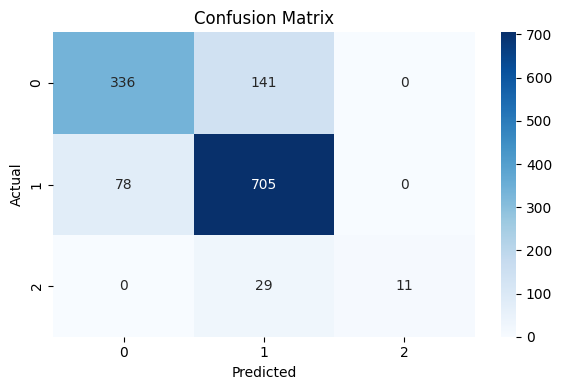

In [65]:
knn_raw = KNeighborsClassifier(**grid_knn.best_params_)
knn_raw.fit(X_train, y_train)

# --- Predict on validation set ---
y_pred = knn_raw.predict(X_val)

# --- Classification Report ---
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_val, y_pred)

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid_knn.classes_,
            yticklabels=grid_knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.65      0.70       477
           1       0.77      0.86      0.81       783
           2       1.00      0.03      0.05        40

    accuracy                           0.76      1300
   macro avg       0.84      0.51      0.52      1300
weighted avg       0.77      0.76      0.75      1300



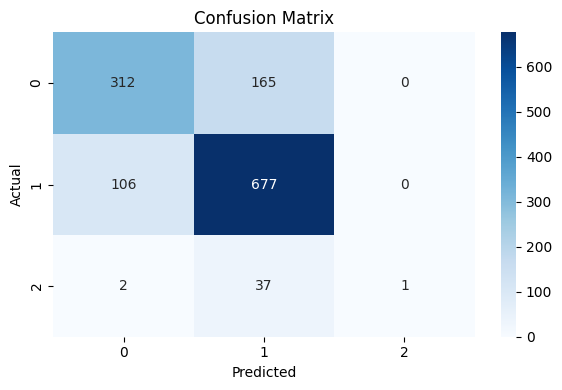

In [66]:
svm_raw = SVC(**grid_svm.best_params_, probability=True)
svm_raw.fit(X_train, y_train)

# --- Predict on validation set ---
y_pred = svm_raw.predict(X_val)

# --- Classification Report ---
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_val, y_pred)

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid_svm.classes_,
            yticklabels=grid_svm.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       477
           1       0.78      0.76      0.77       783
           2       0.33      0.38      0.35        40

    accuracy                           0.72      1300
   macro avg       0.59      0.61      0.60      1300
weighted avg       0.73      0.72      0.72      1300



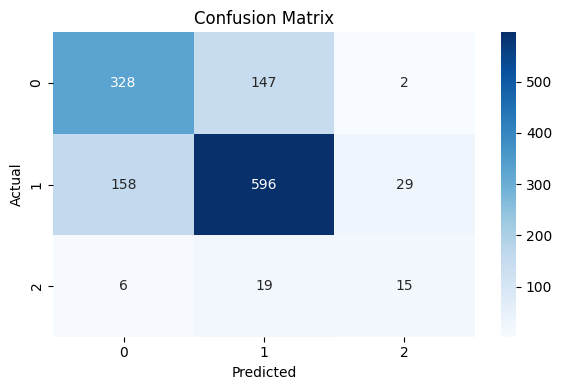

In [67]:
dt_raw = DecisionTreeClassifier(**grid_dt.best_params_, random_state=42)
dt_raw.fit(X_train, y_train)

# --- Predict on validation set ---
y_pred = dt_raw.predict(X_val)

# --- Classification Report ---
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_val, y_pred)

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid_dt.classes_,
            yticklabels=grid_dt.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       477
           1       0.82      0.90      0.86       783
           2       1.00      0.25      0.40        40

    accuracy                           0.82      1300
   macro avg       0.88      0.63      0.68      1300
weighted avg       0.82      0.82      0.81      1300



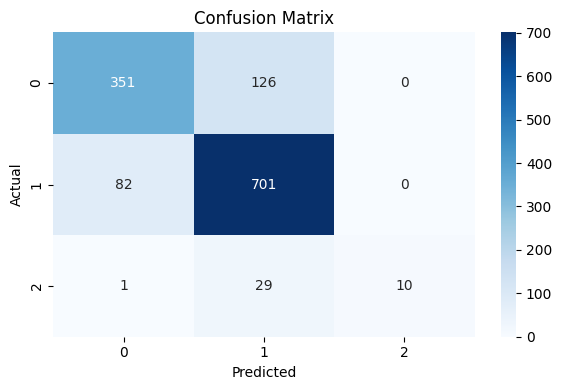

In [68]:
rf_raw = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
rf_raw.fit(X_train, y_train)\

# --- Predict on validation set ---
y_pred = rf_raw.predict(X_val)

# --- Classification Report ---
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_val, y_pred)

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid_rf.classes_,
            yticklabels=grid_rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       477
           1       0.82      0.89      0.85       783
           2       1.00      0.25      0.40        40

    accuracy                           0.81      1300
   macro avg       0.87      0.62      0.67      1300
weighted avg       0.82      0.81      0.80      1300



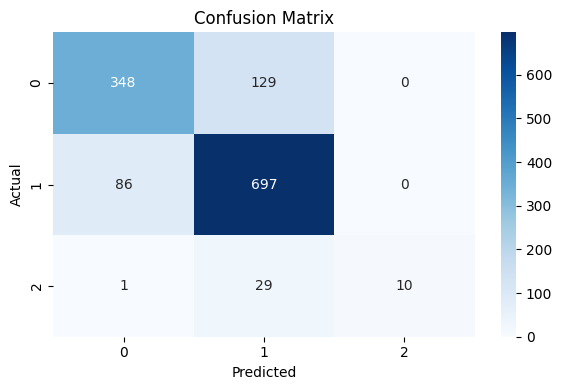

In [69]:
xgb_raw = xgb.XGBClassifier(
    **grid_xgb.best_params_,
    random_state=42,
)
xgb_raw.fit(X_train, y_train)

# --- Predict on validation set ---
y_pred = xgb_raw.predict(X_val)

# --- Classification Report ---
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_val, y_pred)

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid_xgb.classes_,
            yticklabels=grid_xgb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

## Skenario 2 (SMOTE)

In [70]:
# ==========================================================
# 1. ORDINAL ENCODE TARGET (Bad < Middle < Good)
# ==========================================================

quality_order = ["Bad", "Middle", "Good"]
ord_encoder = OrdinalEncoder(categories=[quality_order])

df_copy["quality_encoded"] = ord_encoder.fit_transform(df_copy[["quality"]]).astype(int)

# ==========================================================
# 2. IDENTIFY NUMERIC & CATEGORICAL COLUMNS
# ==========================================================

cat_col = df_copy.select_dtypes(include="object").columns.tolist()
cat_col = [col for col in cat_col if col != "quality"]

num_col = df_copy.select_dtypes(include=["float64", "int64"]).columns.tolist()
num_col = [col for col in num_col if col not in ["quality", "quality_encoded"]]

# ==========================================================
# 3. PREPROCESSING PIPELINES
# ==========================================================

numeric_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_col),
    ("cat", categorical_pipeline, cat_col)
])

# ==========================================================
# 4. TRAIN–TEST SPLIT
# ==========================================================

X = df_copy.drop(["quality", "quality_encoded"], axis=1)
y = df_copy["quality_encoded"]

X_train_sampling, X_val_sampling, y_train_sampling, y_val_sampling = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ==========================================================
# 5. APPLY PREPROCESSING
# ==========================================================

X_train_sampling = preprocessor.fit_transform(X_train_sampling)
X_val_sampling = preprocessor.transform(X_val_sampling)

# ==========================================================
# 6. APPLY SMOTE **ONLY ON TRAINING DATA**
# ==========================================================

smote = SMOTE(random_state=42)
X_train_sampling, y_train_sampling = smote.fit_resample(X_train_sampling, y_train_sampling)

print("SMOTE applied. New training distribution:")
print(pd.Series(y_train_sampling).value_counts())

# ==========================================================
# 7. OUTPUT SHAPES
# ==========================================================

print("Preprocessing complete.")
print(f"Train shape after SMOTE: {X_train_sampling.shape}")
print(f"Validatios shape: {X_val_sampling.shape}")


SMOTE applied. New training distribution:
quality_encoded
1    3132
0    3132
2    3132
Name: count, dtype: int64
Preprocessing complete.
Train shape after SMOTE: (9396, 13)
Validatios shape: (1300, 13)



Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       477
           1       0.85      0.69      0.76       783
           2       0.18      0.70      0.29        40

    accuracy                           0.73      1300
   macro avg       0.59      0.73      0.61      1300
weighted avg       0.79      0.73      0.75      1300



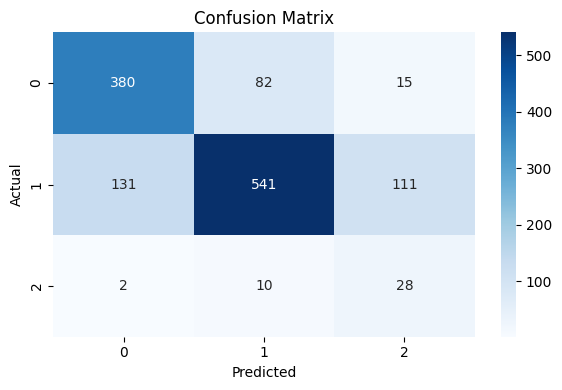

In [71]:
knn_sampling = KNeighborsClassifier(**grid_knn.best_params_)
knn_sampling.fit(X_train_sampling, y_train_sampling)

# --- Predict on validation set ---
y_pred = knn_sampling.predict(X_val_sampling)

# --- Classification Report ---
print("\nClassification Report:\n")
print(classification_report(y_val_sampling, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_val_sampling, y_pred)

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid_knn.classes_,
            yticklabels=grid_knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()



Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       477
           1       0.80      0.64      0.71       783
           2       0.18      0.57      0.28        40

    accuracy                           0.68      1300
   macro avg       0.55      0.66      0.56      1300
weighted avg       0.73      0.68      0.70      1300



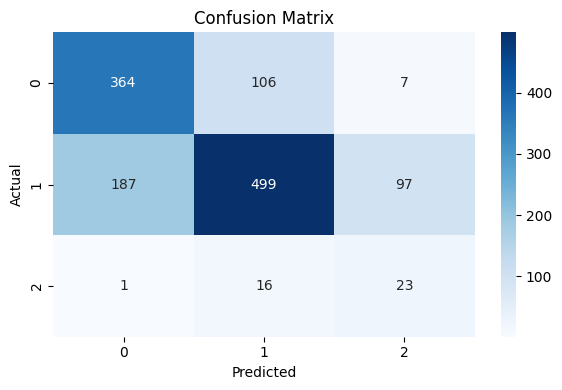

In [72]:
svm_sampling = SVC(**grid_svm.best_params_, probability=True)
svm_sampling.fit(X_train_sampling, y_train_sampling)

# --- Predict on validation set ---
y_pred = svm_sampling.predict(X_val_sampling)

# --- Classification Report ---
print("\nClassification Report:\n")
print(classification_report(y_val_sampling, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_val_sampling, y_pred)

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid_svm.classes_,
            yticklabels=grid_svm.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       477
           1       0.77      0.69      0.73       783
           2       0.22      0.53      0.31        40

    accuracy                           0.68      1300
   macro avg       0.55      0.63      0.57      1300
weighted avg       0.71      0.68      0.69      1300



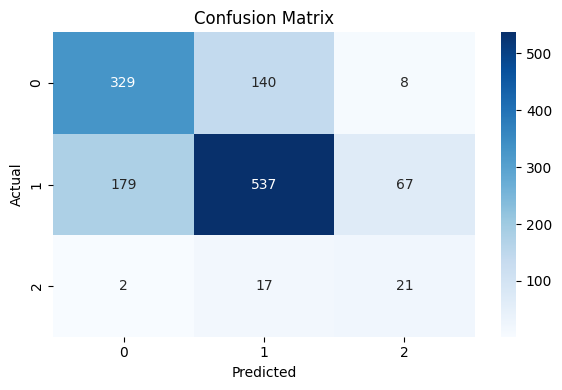

In [73]:
dt_sampling = DecisionTreeClassifier(**grid_dt.best_params_, random_state=42)
dt_sampling.fit(X_train_sampling, y_train_sampling)

# --- Predict on validation set ---
y_pred = dt_sampling.predict(X_val_sampling)

# --- Classification Report ---
print("\nClassification Report:\n")
print(classification_report(y_val_sampling, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_val_sampling, y_pred)

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid_dt.classes_,
            yticklabels=grid_dt.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       477
           1       0.84      0.85      0.85       783
           2       0.42      0.38      0.39        40

    accuracy                           0.81      1300
   macro avg       0.69      0.67      0.68      1300
weighted avg       0.81      0.81      0.81      1300



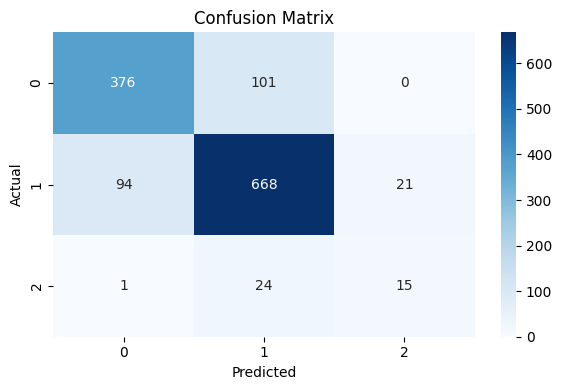

In [74]:
rf_sampling = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
rf_sampling.fit(X_train_sampling, y_train_sampling)

# --- Predict on validation set ---
y_pred = rf_sampling.predict(X_val_sampling)

# --- Classification Report ---
print("\nClassification Report:\n")
print(classification_report(y_val_sampling, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_val_sampling, y_pred)

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid_rf.classes_,
            yticklabels=grid_rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       477
           1       0.84      0.83      0.84       783
           2       0.38      0.38      0.38        40

    accuracy                           0.80      1300
   macro avg       0.67      0.66      0.67      1300
weighted avg       0.80      0.80      0.80      1300



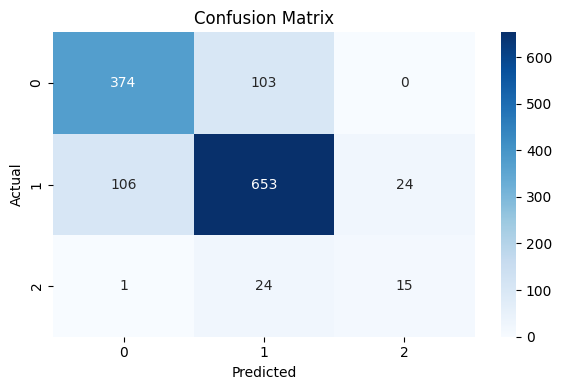

In [75]:
xgb_sampling = xgb.XGBClassifier(
    **grid_xgb.best_params_,
    random_state=42,
)
xgb_sampling.fit(X_train_sampling, y_train_sampling)

# --- Predict on validation set ---
y_pred = xgb_sampling.predict(X_val_sampling)

# --- Classification Report ---
print("\nClassification Report:\n")
print(classification_report(y_val_sampling, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_val_sampling, y_pred)

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid_xgb.classes_,
            yticklabels=grid_xgb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

## Skenario 3 (Shap Analysis)

In [76]:
# Create the new SHAP Explainer (model-agnostic, no additivity issues)
explainer = shap.Explainer(rf_raw.predict_proba, X_train)

# Compute SHAP values for validation set
shap_values = explainer(X_val)

PermutationExplainer explainer: 1301it [21:41,  1.01s/it]                          



=== BAR PLOT FOR CLASS 0 ===


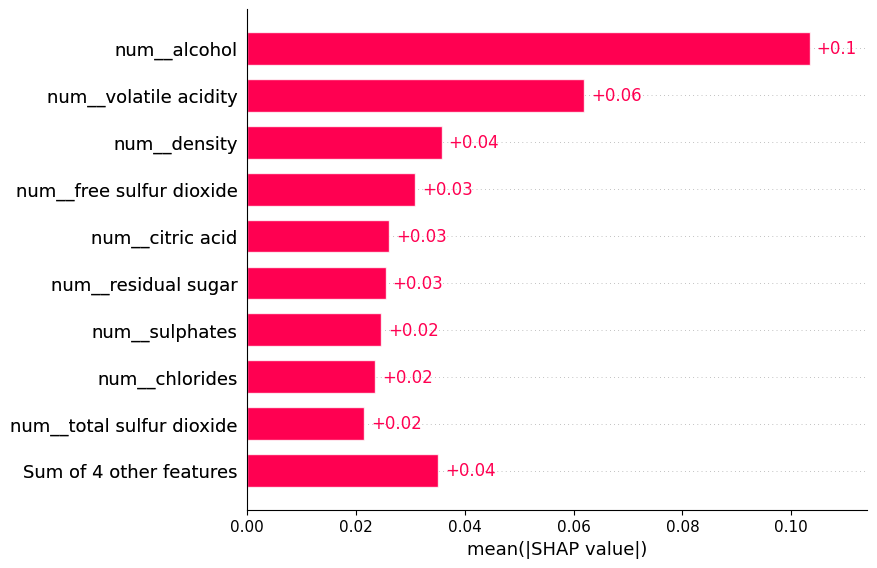


=== BAR PLOT FOR CLASS 1 ===


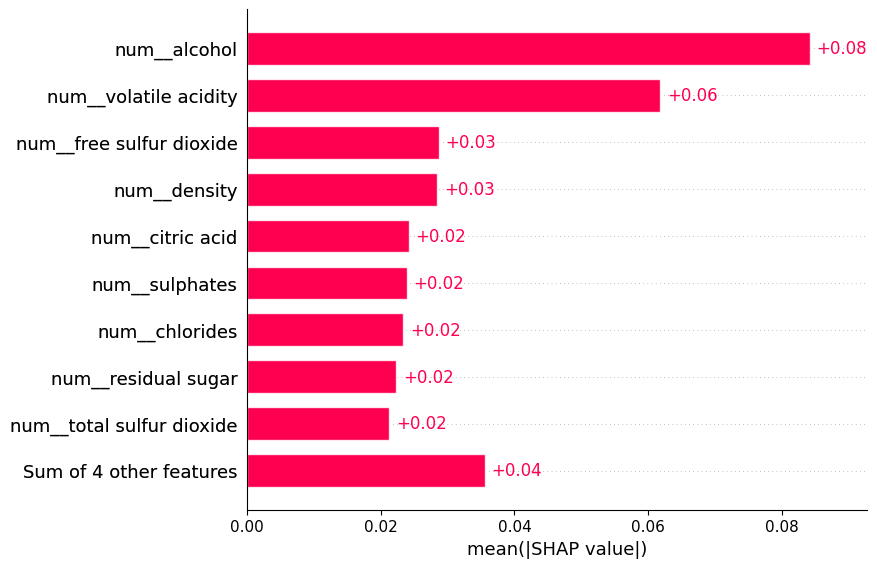


=== BAR PLOT FOR CLASS 2 ===


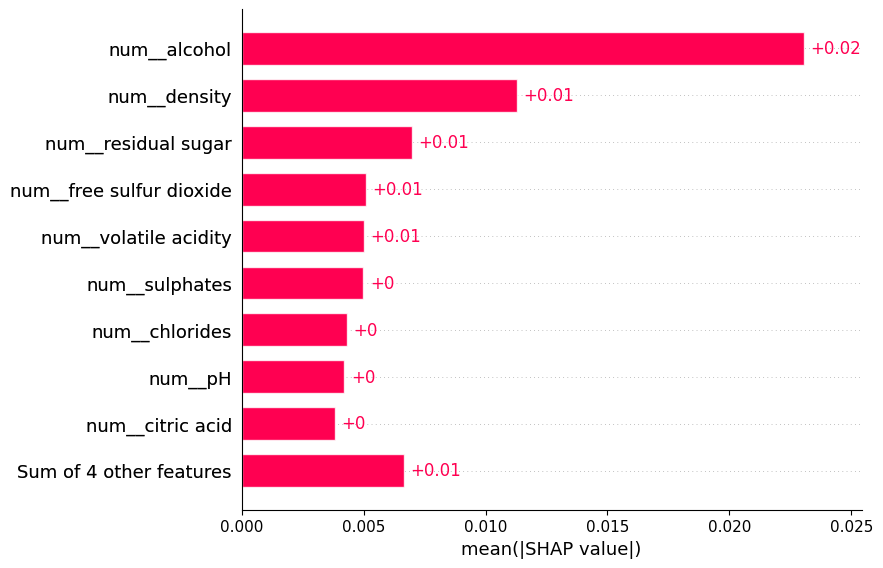

In [77]:
for c in range(shap_values.values.shape[2]):
    print(f"\n=== BAR PLOT FOR CLASS {c} ===")
    shap.plots.bar(shap_values[:,:,c])

### Sample Analysis

Target (y_val) examined: 1


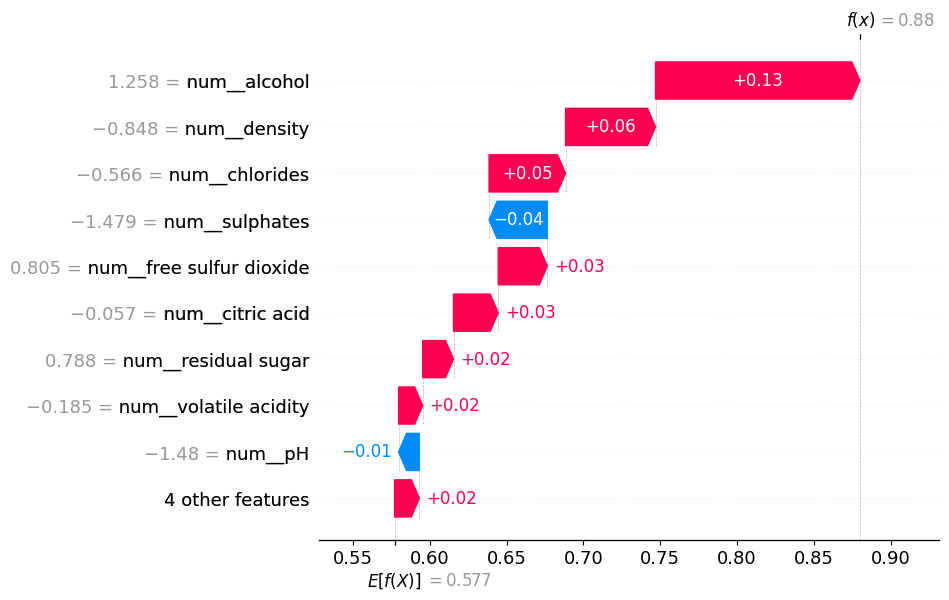

In [112]:
idx = 3         # sample index you want to explain
class_id = 1   # class you want to explain

print("Target (y_val) examined:", y_val.iloc[idx])

# Waterfall for that row & class
shap.plots.waterfall(
    shap_values[idx, :, class_id],
)

Target (y_val) examined: 1


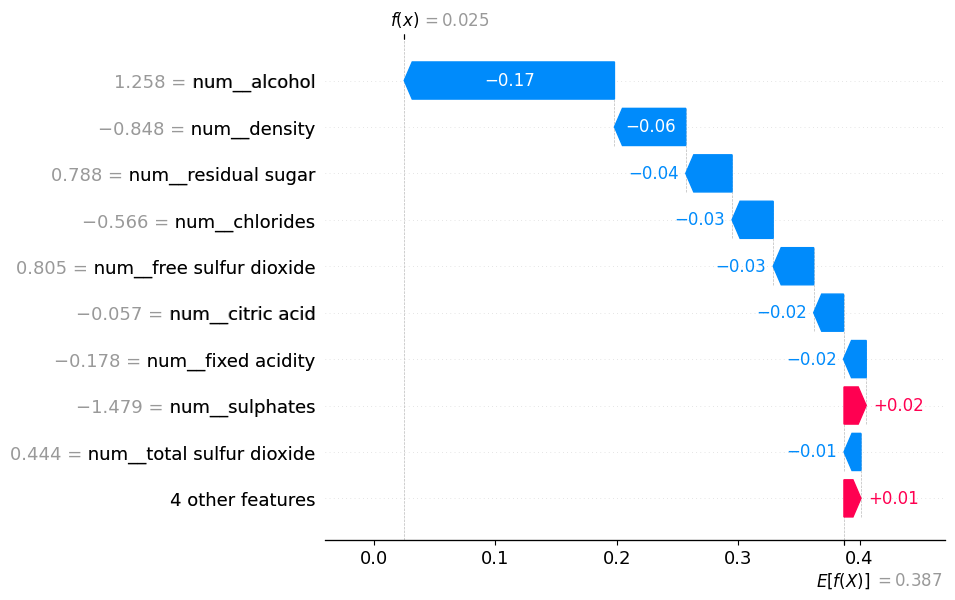

In [148]:
idx = 3         # sample index you want to explain
class_id = 0   # class you want to explain

print("Target (y_val) examined:", y_val.iloc[idx])

# Waterfall for that row & class
shap.plots.waterfall(
    shap_values[idx, :, class_id],
)

Target (y_val) examined: 1


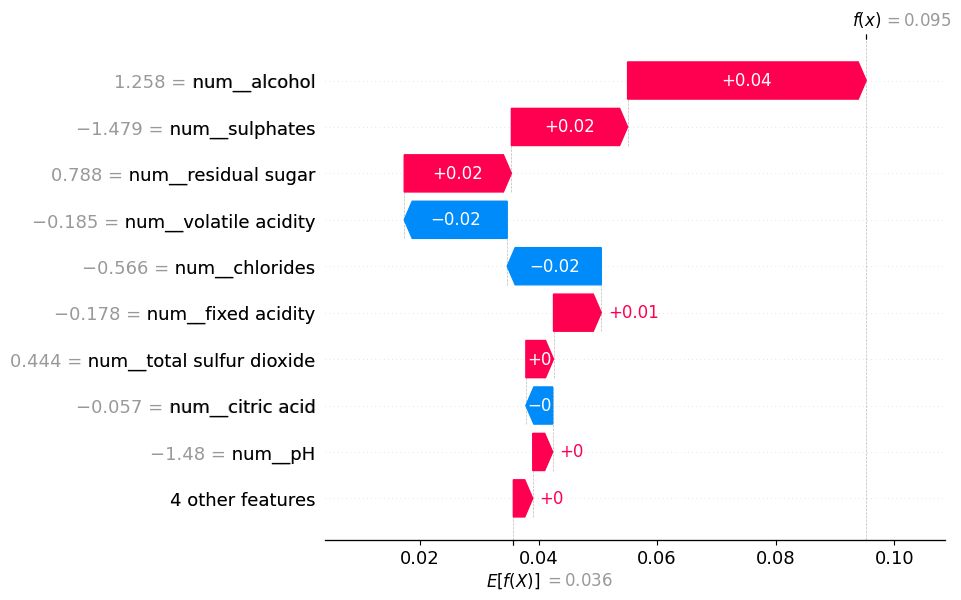

In [149]:
idx = 3         # sample index you want to explain
class_id = 2   # class you want to explain

print("Target (y_val) examined:", y_val.iloc[idx])

# Waterfall for that row & class
shap.plots.waterfall(
    shap_values[idx, :, class_id],
)